In [6]:
import pandas as pd

def read_csv_and_show_shape(file_path):
    try:
        # CSV 파일 읽기
        df = pd.read_csv(file_path)
        
        # shape 출력
        print("불러온 CSV 파일의 shape:", df.shape)
        
        return df
        
    except FileNotFoundError:
        print("파일을 찾을 수 없습니다.")
    except Exception as e:
        print("오류 발생:", e)


In [7]:
# CSV 파일 경로 설정
file_path = "combined_baseball_stats.csv"  # 여기에 실제 파일 경로를 입력해주세요.
pd.options.display.max_columns = None

# 함수 호출
df = read_csv_and_show_shape(file_path)

불러온 CSV 파일의 shape: (10902, 31)


이후 분석에 의미없는 컬럼 제거한제거 한 데이터 불러오기

In [8]:
file_path = "preprocessed_stat.csv"  # 여기에 실제 파일 경로를 입력해주세요.

df2 = read_csv_and_show_shape(file_path)

불러온 CSV 파일의 shape: (9156, 26)


# mice 결측치 대체법

## mice 결측치 검증

In [9]:
selected_columns = ['war',  'wRC+', '종합 RAA', 'WAAwoPOS',"rangeRAA"]
df_selected = df2[selected_columns]

In [10]:
df_selected_cleaned = df_selected.dropna()
tmp = df_selected_cleaned

In [11]:


import numpy as np

# 결측치 비율 설정
missing_ratio = 0.25

# 종합 RAA 및 WAAwoPOS 컬럼에 대해 결측치 생성
missing_count_raa = int(len(df_selected_cleaned) * missing_ratio)
missing_count_waawopos = int(len(df_selected_cleaned) * missing_ratio)
missing_count_rangeraa = int(len(df_selected_cleaned) * missing_ratio)

# 무작위 인덱스 선택하여 결측치 생성
missing_indices_raa = np.random.choice(df_selected_cleaned.index, size=missing_count_raa, replace=False)
missing_indices_waawopos = np.random.choice(df_selected_cleaned.index, size=missing_count_waawopos, replace=False)
missing_indices_rangeraa = np.random.choice(df_selected_cleaned.index, size=missing_count_rangeraa, replace=False)

tmp.loc[missing_indices_raa, '종합 RAA'] = np.nan
tmp.loc[missing_indices_waawopos, 'WAAwoPOS'] = np.nan
tmp.loc[missing_indices_waawopos, 'rangeRAA'] = np.nan
# 결과 확인
print("종합 RAA에 생성된 결측치 수:", len(missing_indices_raa))
print("WAAwoPOS에 생성된 결측치 수:", len(missing_indices_waawopos))
print("WAAwoPOS에 생성된 결측치 수:", len(missing_indices_rangeraa))


종합 RAA에 생성된 결측치 수: 2289
WAAwoPOS에 생성된 결측치 수: 2289
WAAwoPOS에 생성된 결측치 수: 2289


In [12]:
from fancyimpute import IterativeImputer

# MICE 방법을 사용하여 결측치 대체
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(tmp)

# 대체된 데이터프레임 생성
imputed_df = pd.DataFrame(imputed_data, columns=tmp.columns, index=tmp.index)

# 결과 확인
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   war       9156 non-null   float64
 1   wRC+      9156 non-null   float64
 2   종합 RAA    9156 non-null   float64
 3   WAAwoPOS  9156 non-null   float64
 4   rangeRAA  9156 non-null   float64
dtypes: float64(5)
memory usage: 357.8 KB


## 검증 결과


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 종합 RAA와 WAAwoPOS 컬럼 추출
original_raa = df2['종합 RAA'].values
original_waawopos = df2['WAAwoPOS'].values
original_rangeRAA = df2['rangeRAA'].values

imputed_raa = imputed_df['종합 RAA'].values
imputed_waawopos = imputed_df['WAAwoPOS'].values
imputed_rangeRAA = imputed_df['rangeRAA'].values
# RMSE 계산
raa_rmse = np.sqrt(mean_squared_error(original_raa, imputed_raa))
waawopos_rmse = np.sqrt(mean_squared_error(original_waawopos, imputed_waawopos))
rangeRAA_rmse = np.sqrt(mean_squared_error(original_rangeRAA, imputed_rangeRAA))

# MAE 계산
raa_mae = mean_absolute_error(original_raa, imputed_raa)
waawopos_mae = mean_absolute_error(original_waawopos, imputed_waawopos)
rangeRAA_mae = mean_absolute_error(original_rangeRAA, imputed_rangeRAA)

# R-squared 계산
raa_r2 = r2_score(original_raa, imputed_raa)
waawopos_r2 = r2_score(original_waawopos, imputed_waawopos)
rangeRAA_r2 = r2_score(original_rangeRAA, imputed_rangeRAA)

print("RMSE (종합 RAA):", raa_rmse)
print("MAE (종합 RAA):", raa_mae)
print("R-squared (종합 RAA):", raa_r2)
print()
print("RMSE (WAAwoPOS):", waawopos_rmse)
print("MAE (WAAwoPOS):", waawopos_mae)
print("R-squared (WAAwoPOS):", waawopos_r2)
print()
print("RMSE (rangeRAA):", rangeRAA_rmse)
print("MAE (rangeRAA):", rangeRAA_mae)
print("R-squared (rangeRAA):", rangeRAA_r2)



RMSE (종합 RAA): 0.7272254879011564
MAE (종합 RAA): 0.10724000247086188
R-squared (종합 RAA): 0.9532814993170787

RMSE (WAAwoPOS): 0.06885282053132585
MAE (WAAwoPOS): 0.010672563608196847
R-squared (WAAwoPOS): 0.9519109981471534

RMSE (rangeRAA): 0.8546255857796733
MAE (rangeRAA): 0.18112722887006688
R-squared (rangeRAA): 0.9159619082798671


## mice 결측치 대체 시행

In [16]:
from fancyimpute import IterativeImputer
import pandas as pd

# 대상 열 선택
selected_columns = ['war',  'wRC+', '종합 RAA', 'WAAwoPOS','rangeRAA']

# 대상 열 추출
data_for_imputation = df2[selected_columns]

# MICE 방법을 사용하여 결측치 대체
imputer = IterativeImputer()
imputed_data = imputer.fit_transform(data_for_imputation)

# 대체된 데이터프레임 생성
imputed_df = pd.DataFrame(imputed_data, columns=data_for_imputation.columns, index=data_for_imputation.index)

# 결과 확인
imputed_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   war       9156 non-null   float64
 1   wRC+      9156 non-null   float64
 2   종합 RAA    9156 non-null   float64
 3   WAAwoPOS  9156 non-null   float64
 4   rangeRAA  9156 non-null   float64
dtypes: float64(5)
memory usage: 357.8 KB


In [17]:
df2["종합 RAA"] = imputed_df["종합 RAA"]
df2["WAAwoPOS"] = imputed_df["WAAwoPOS"]
df2["rangeRAA"] = imputed_df["rangeRAA"]

df2.info()
df2.to_csv("filtered_imputated_data.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9156 non-null   int64  
 1   war         9156 non-null   float64
 2   타수          9156 non-null   float64
 3   득점          9156 non-null   float64
 4   안타          9156 non-null   float64
 5   2루타         9156 non-null   float64
 6   3루타         9156 non-null   float64
 7   홈런          9156 non-null   float64
 8   타점          9156 non-null   float64
 9   도루성공        9156 non-null   float64
 10  도루실패        9156 non-null   float64
 11  4구          9156 non-null   float64
 12  사구          9156 non-null   float64
 13  고의4구        9156 non-null   float64
 14  삼진          9156 non-null   float64
 15  병살타         9156 non-null   float64
 16  희생타         9156 non-null   float64
 17  희생플라이       9156 non-null   float64
 18  타율          9156 non-null   float64
 19  출루율         9156 non-null  

In [26]:
df2.columns[0]

'Unnamed: 0'

In [34]:
df_tmp = df2.drop(columns=df2.columns[0])
df_tmp

,war,타수,득점,안타,2루타,3루타,홈런,타점,도루성공,도루실패,4구,사구,고의4구,삼진,병살타,희생타,희생플라이,타율,출루율,장타율,R/ePA,wRC+,rangeRAA,종합 RAA,WAAwoPOS
0,5.75,250.0,55.0,103.0,23.0,1.0,19.0,64.0,11.0,3.0,42.0,3.0,10.0,17.0,5.0,0.0,3.0,0.412,0.497,0.740,0.163,237.9,-2.04,-2.04,-0.197
1,4.38,284.0,54.0,97.0,20.0,5.0,8.0,47.0,9.0,2.0,45.0,1.0,3.0,27.0,3.0,0.0,4.0,0.342,0.428,0.532,0.084,178.6,-2.74,-2.74,-0.265
2,3.70,277.0,47.0,76.0,18.0,1.0,2.0,25.0,13.0,10.0,53.0,6.0,0.0,26.0,3.0,4.0,5.0,0.274,0.396,0.368,0.019,126.8,4.58,4.58,0.442
3,3.46,214.0,42.0,72.0,15.0,3.0,3.0,27.0,34.0,14.0,42.0,5.0,0.0,33.0,1.0,2.0,1.0,0.336,0.454,0.477,0.081,176.7,-0.08,-0.08,-0.008
4,3.42,270.0,46.0,78.0,16.0,1.0,13.0,51.0,6.0,3.0,46.0,4.0,1.0,27.0,13.0,0.0,1.0,0.289,0.399,0.500,0.051,152.2,-0.11,1.60,0.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,-0.94,81.0,10.0,16.0,3.0,1.0,1.0,7.0,1.0,3.0,7.0,1.0,0.0,21.0,0.0,0.0,0.0,0.198,0.270,0.296,-0.058,55.1,-0.46,-0.51,-0.049
9152,-0.99,305.0,22.0,75.0,10.0,0.0,2.0,30.0,0.0,1.0,34.0,3.0,1.0,67.0,9.0,1.0,2.0,0.246,0.326,0.298,-0.033,75.9,-5.02,-4.64,-0.449
9153,-1.03,73.0,11.0,11.0,1.0,1.0,2.0,9.0,2.0,0.0,6.0,1.0,0.0,24.0,2.0,1.0,0.0,0.151,0.225,0.274,-0.103,17.4,-1.50,-0.35,-0.034
9154,-2.48,319.0,30.0,71.0,11.0,0.0,5.0,32.0,1.0,3.0,26.0,1.0,0.0,58.0,16.0,2.0,5.0,0.223,0.279,0.304,-0.060,53.6,-10.17,-8.40,-0.814


## 분포 확인

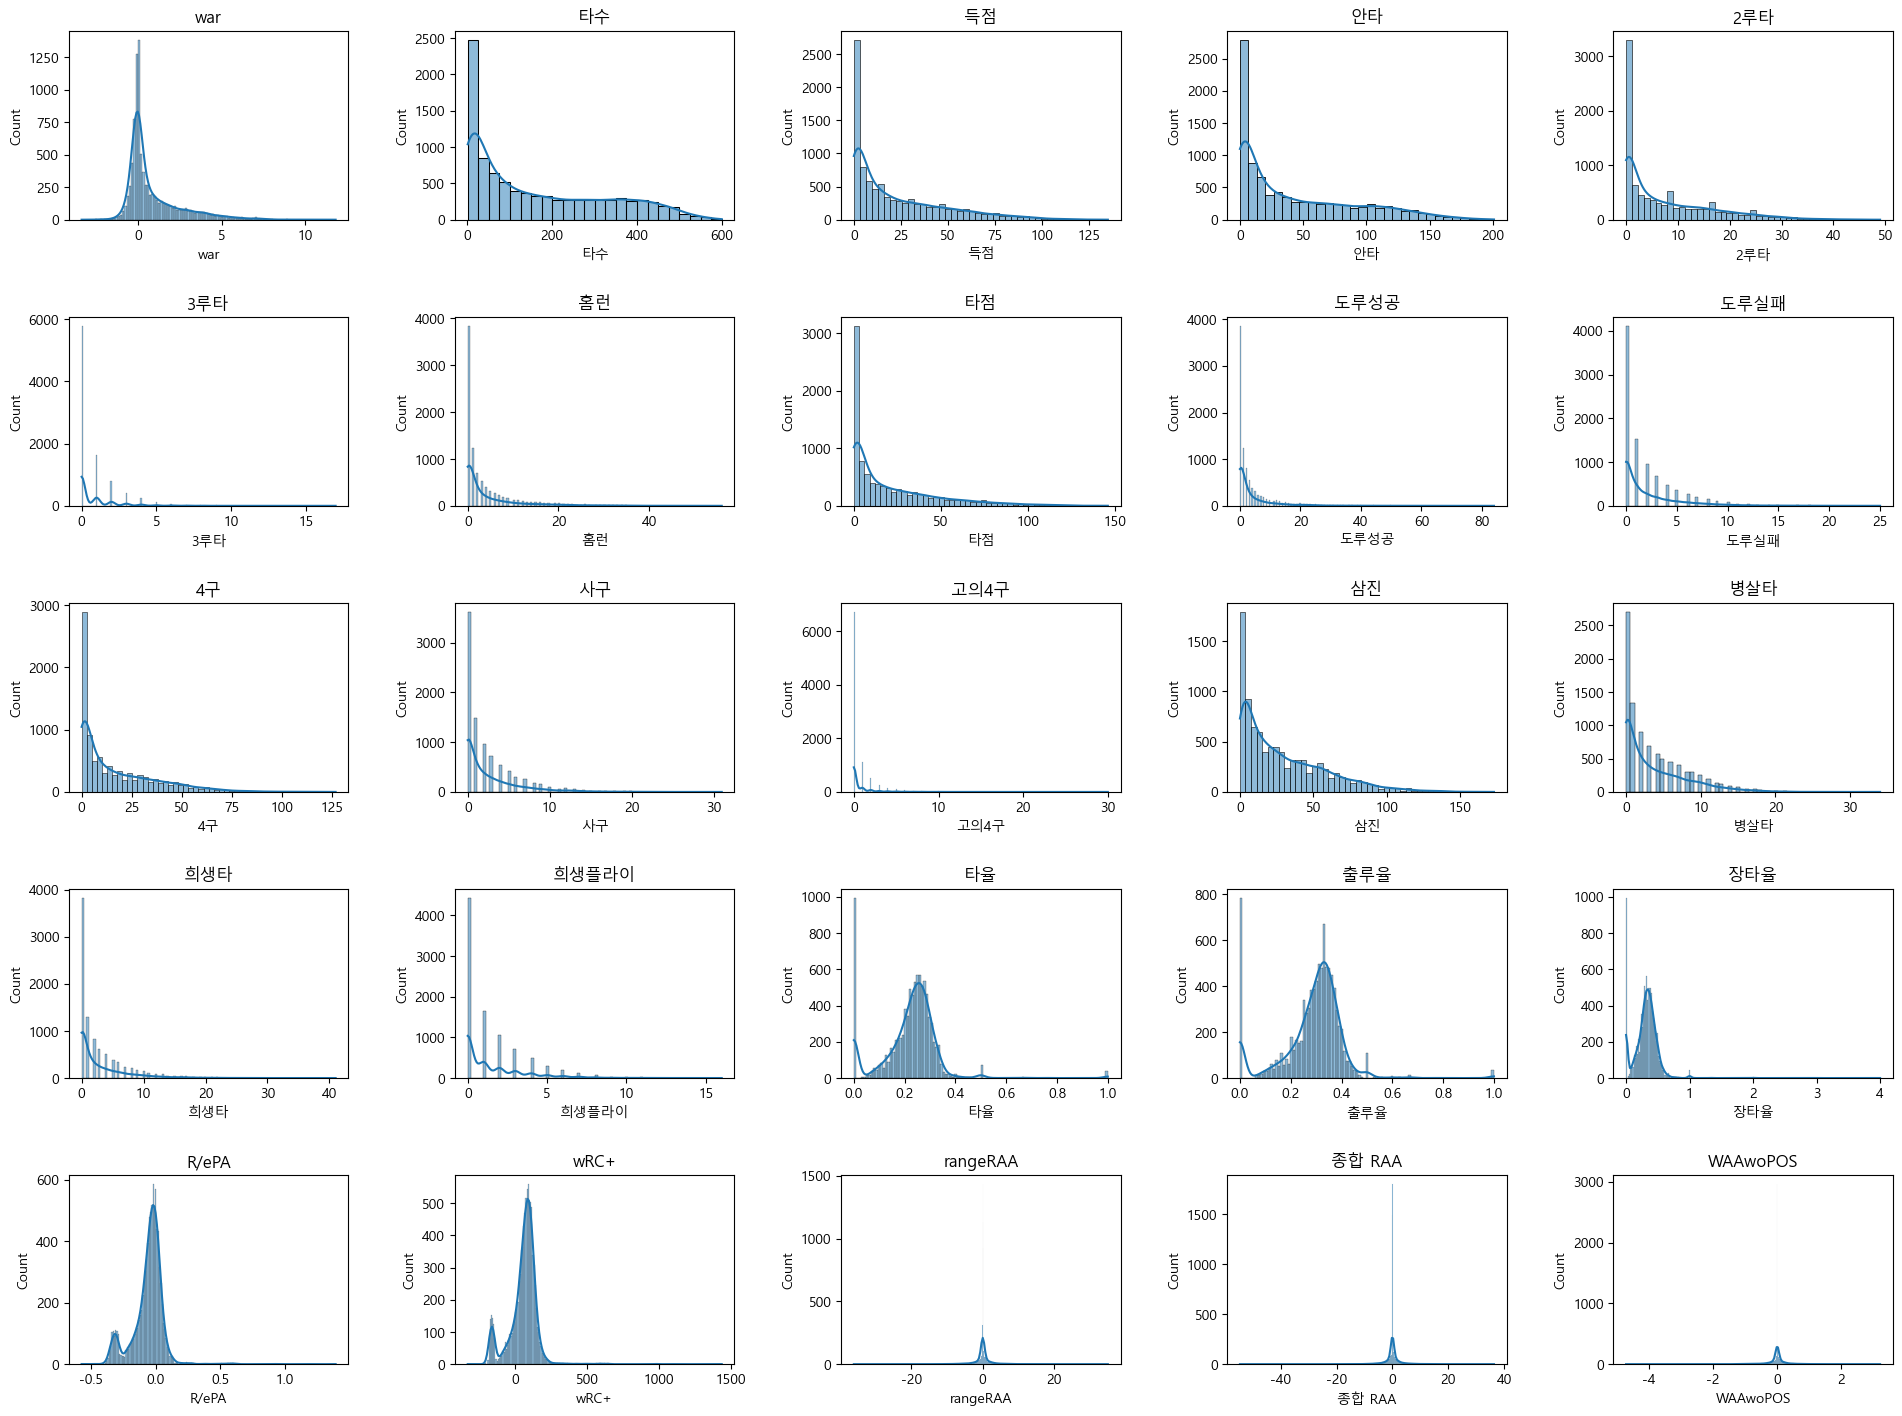

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.tight_layout(pad=5.0)

# Iterate through each column to create histograms
for i, col in enumerate(df_tmp.columns):
    sns.histplot(df_tmp[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

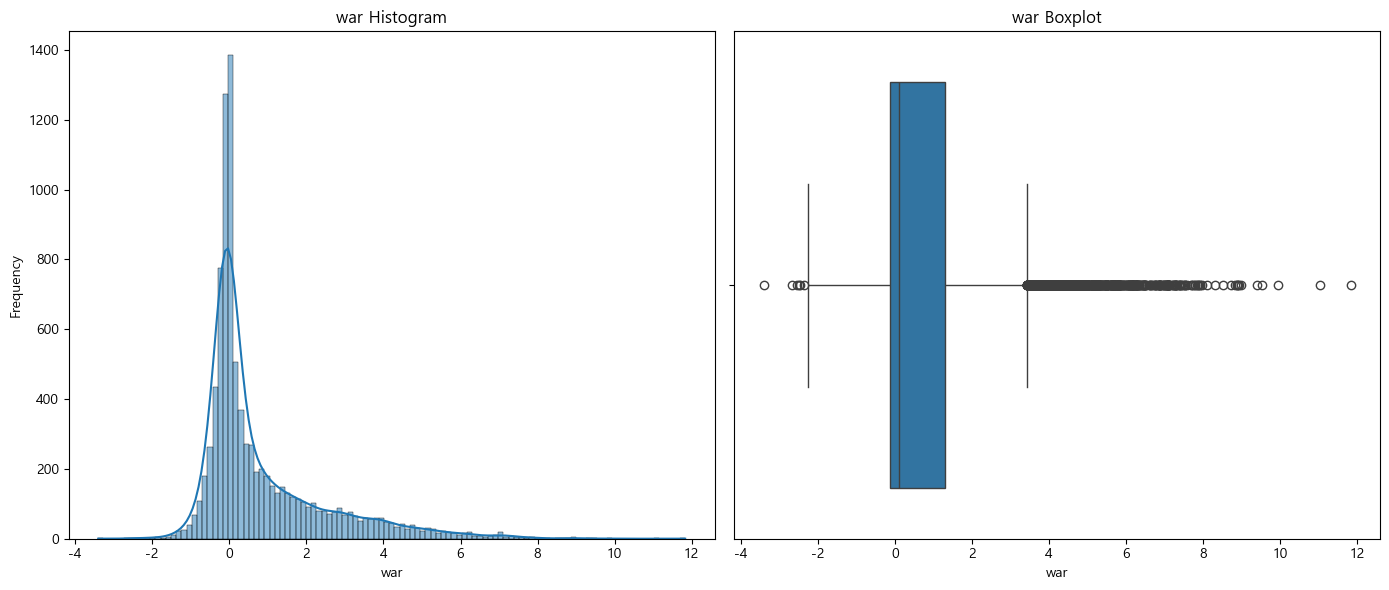

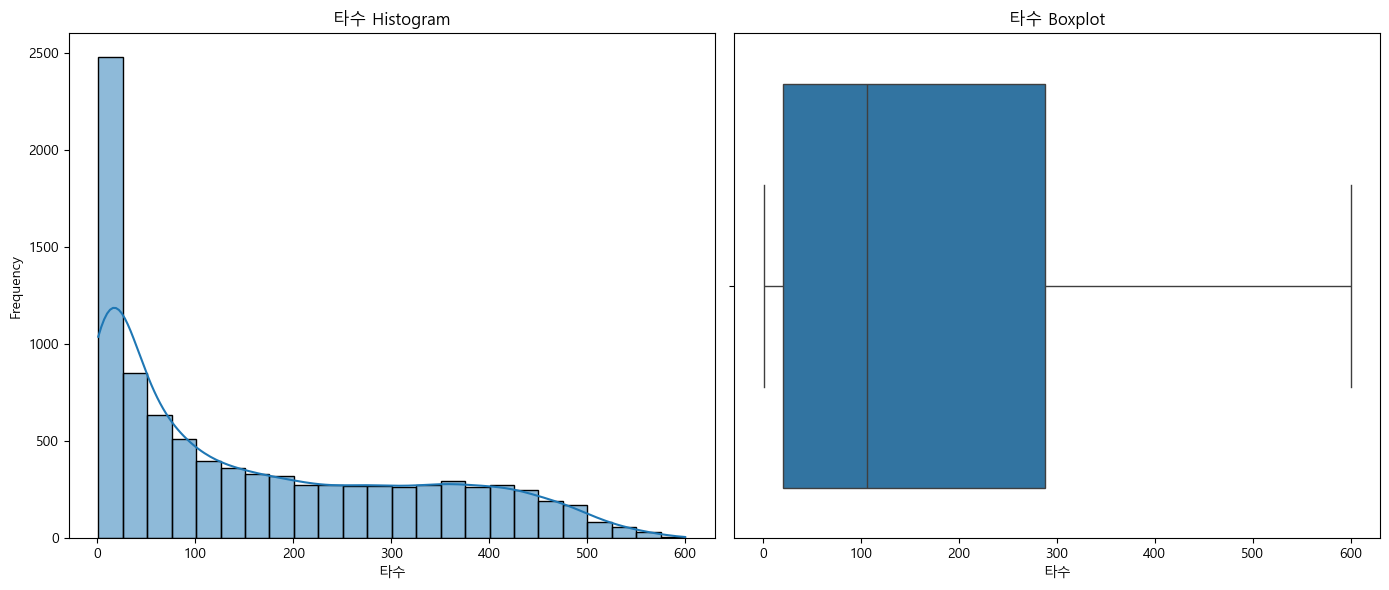

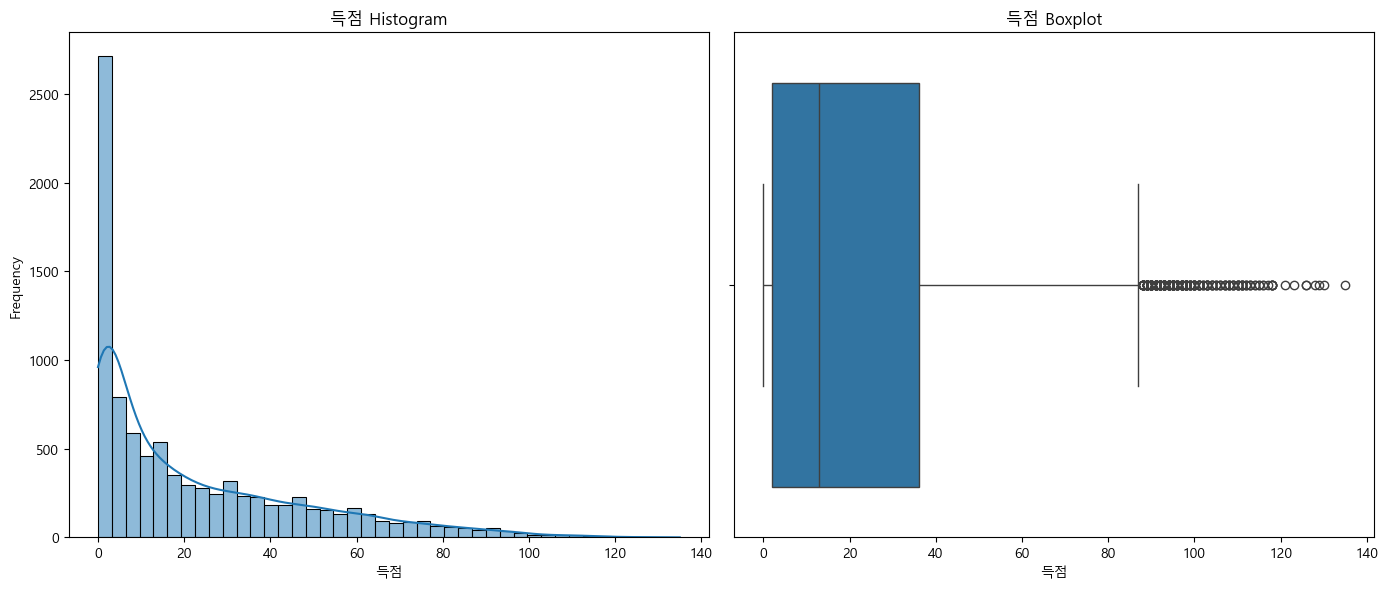

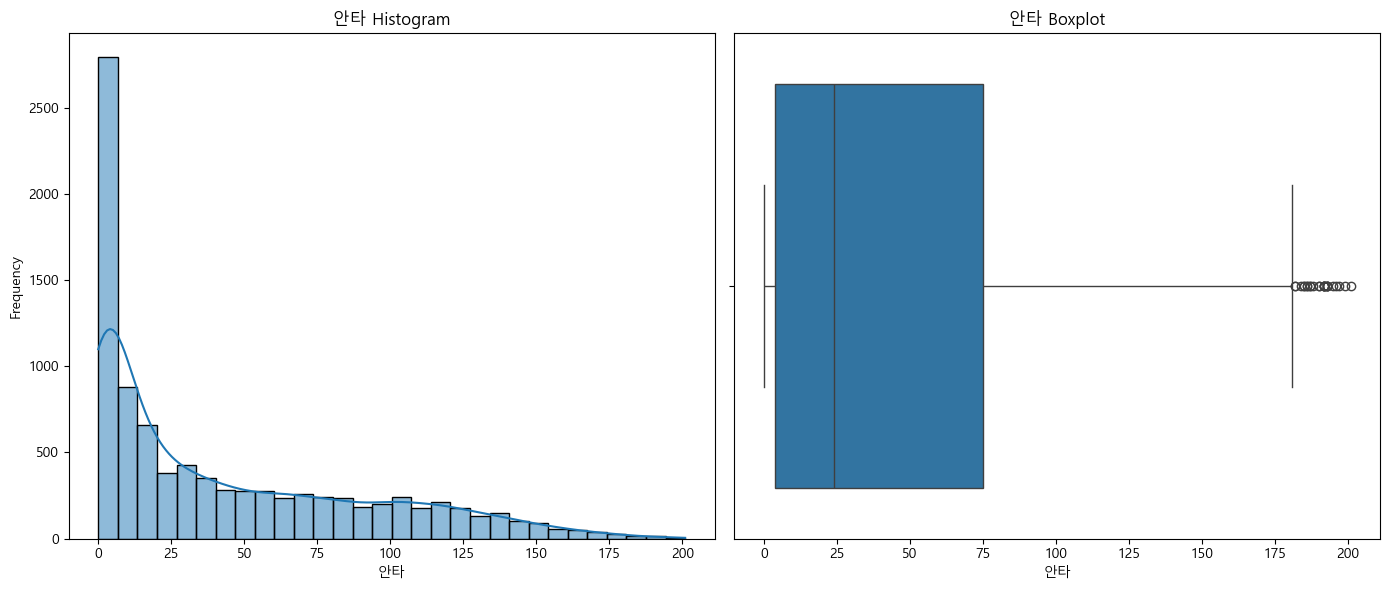

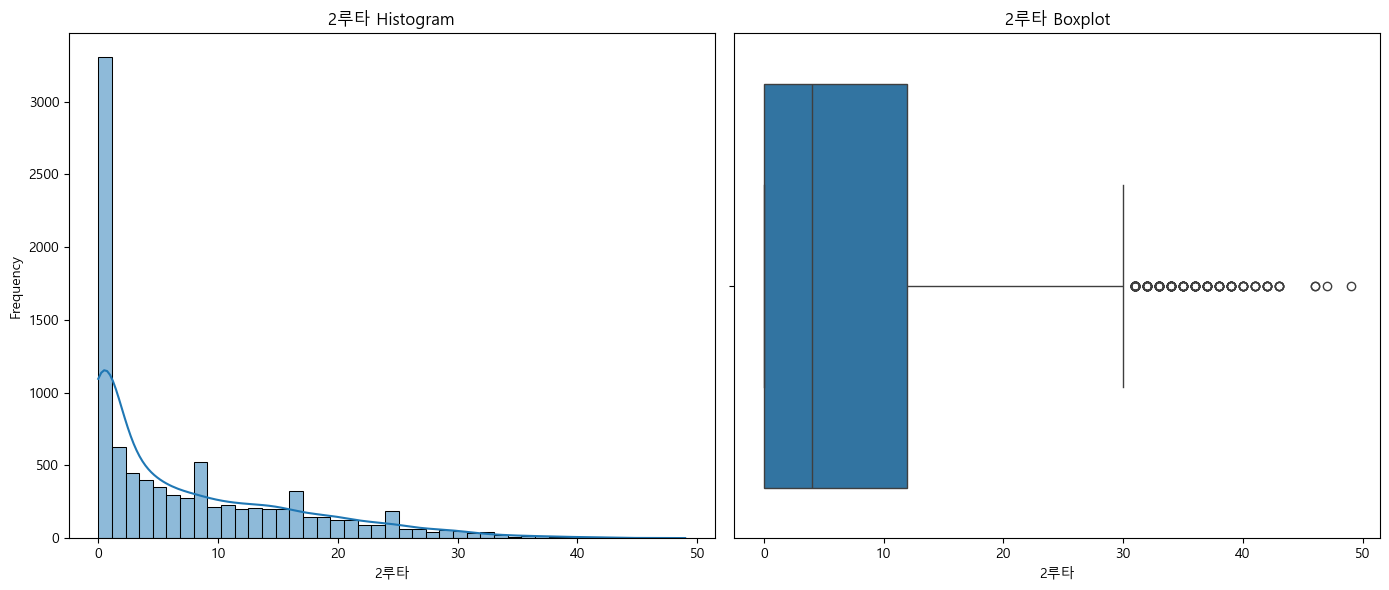

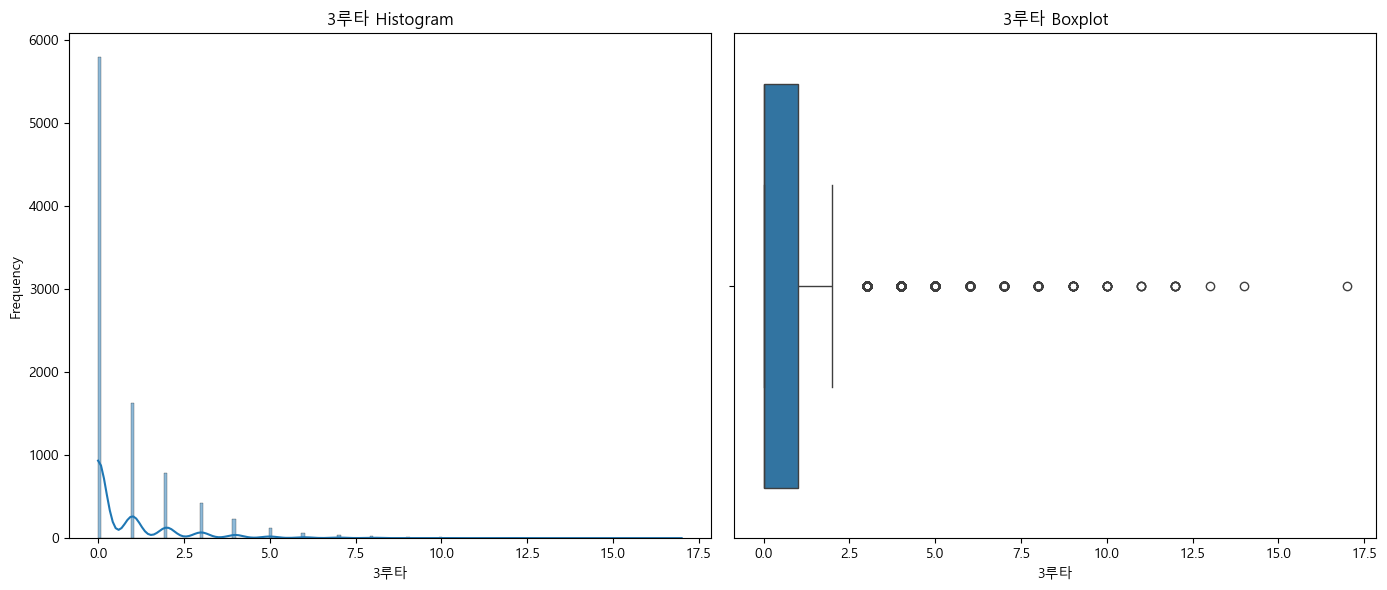

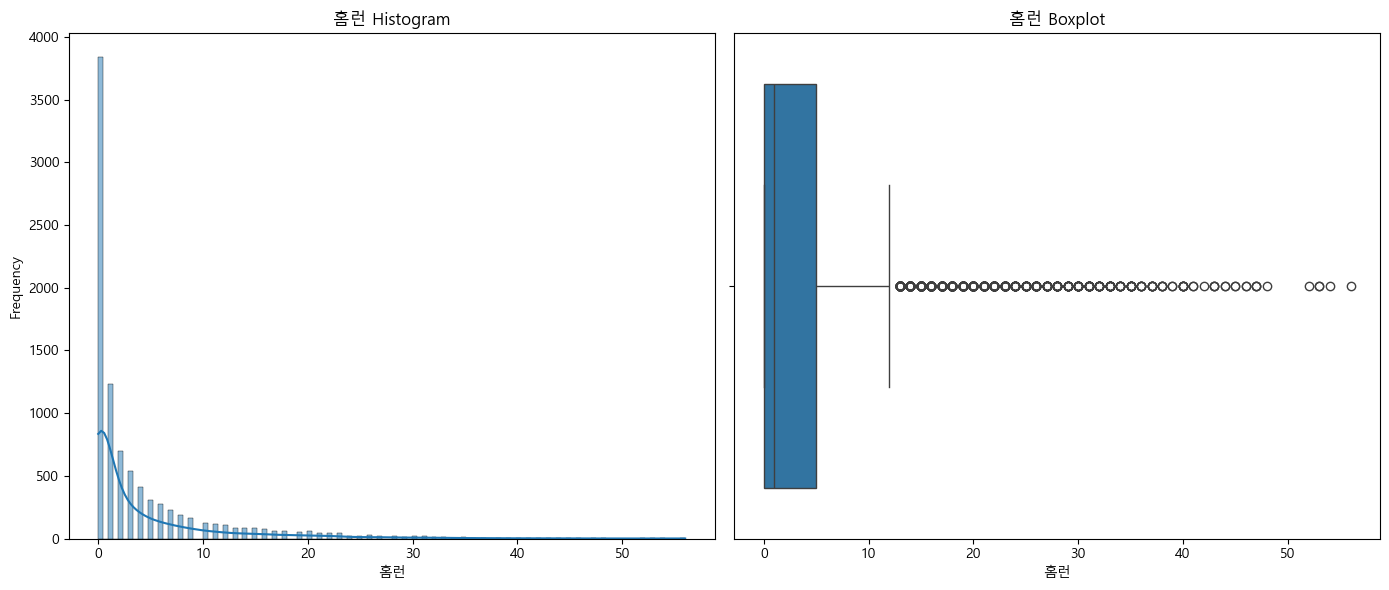

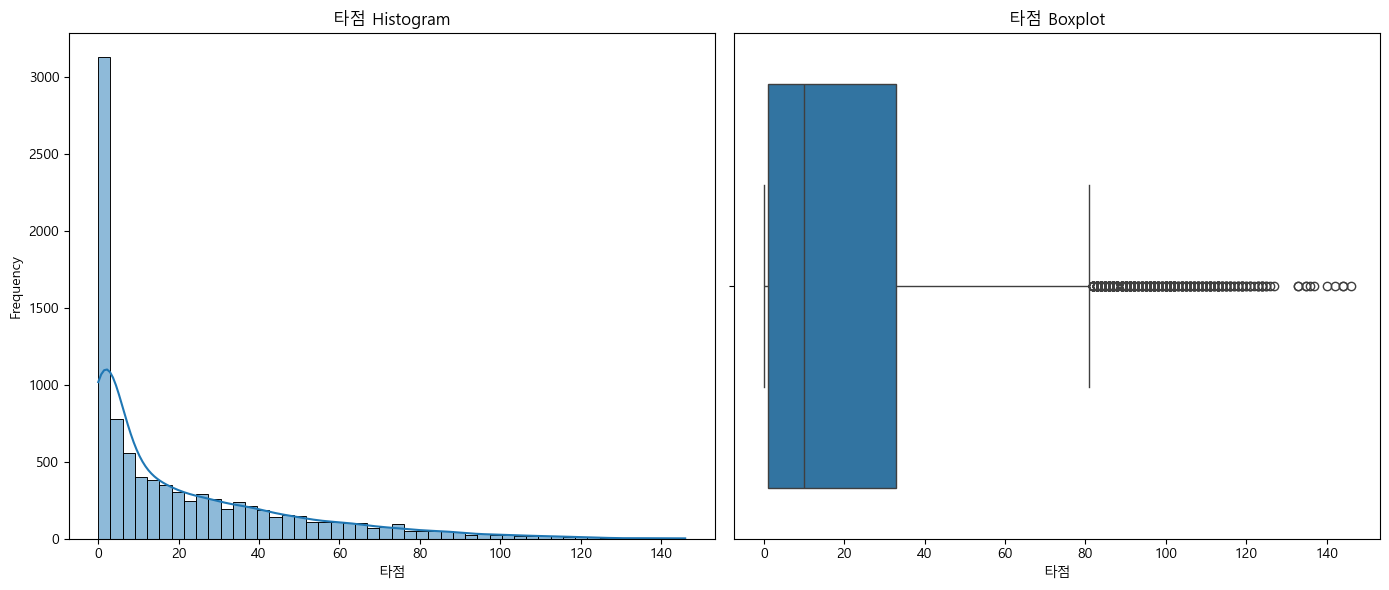

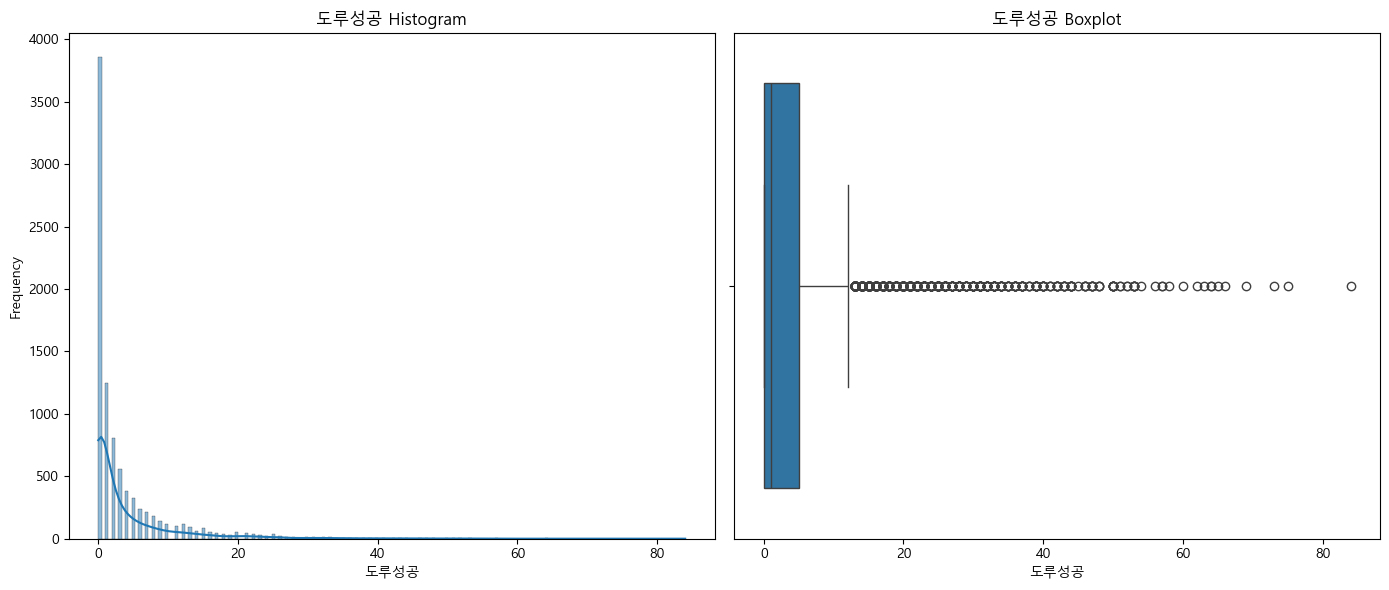

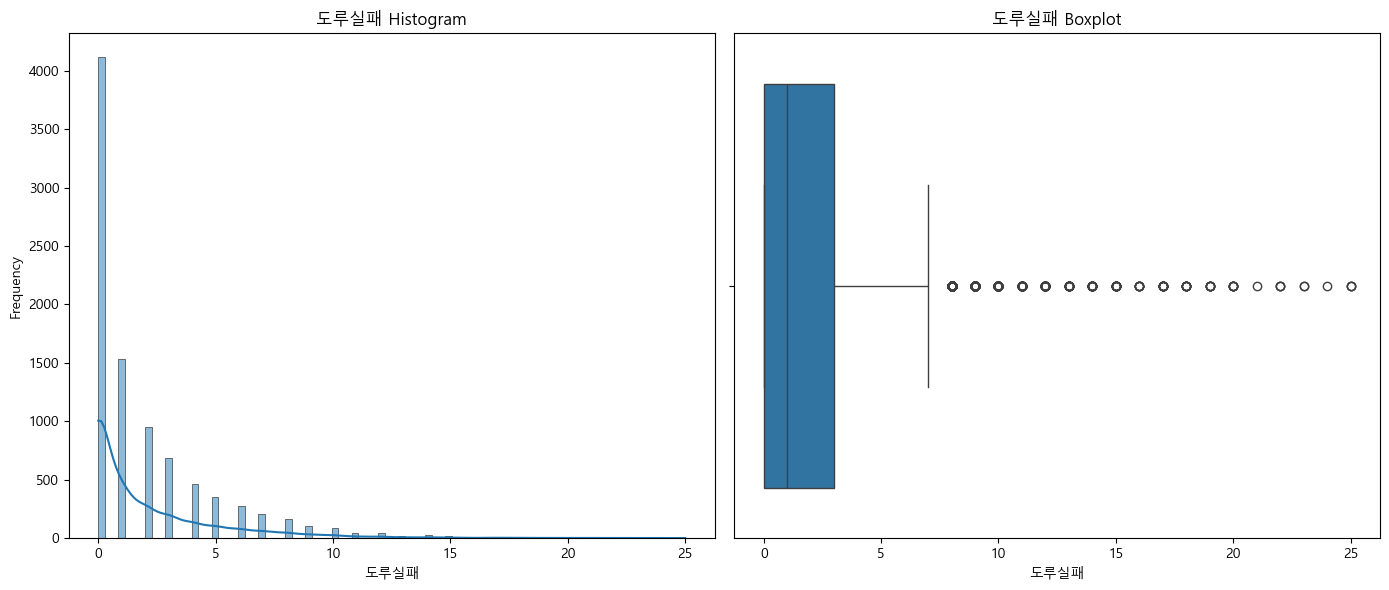

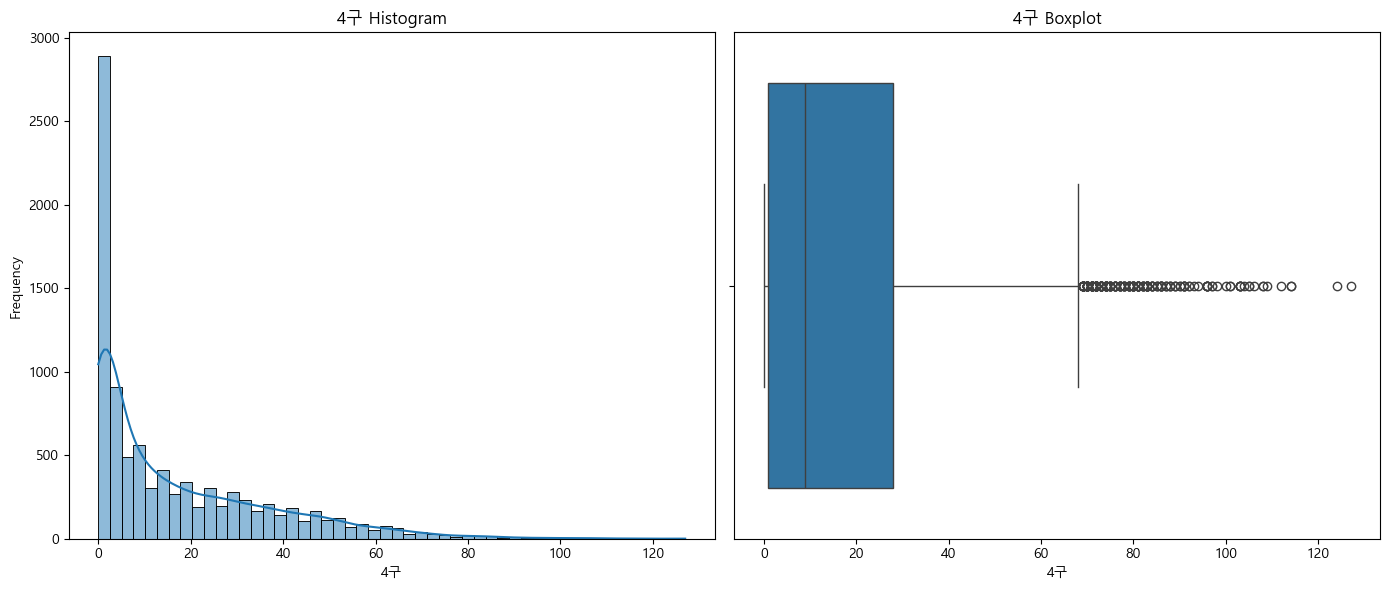

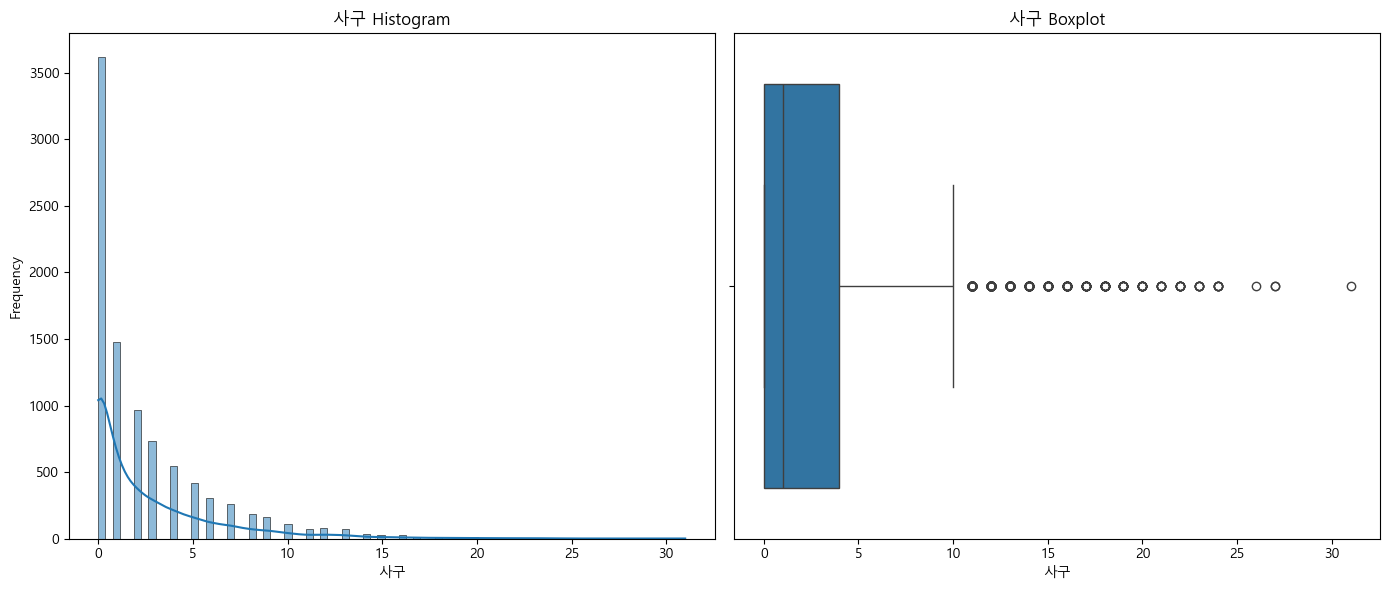

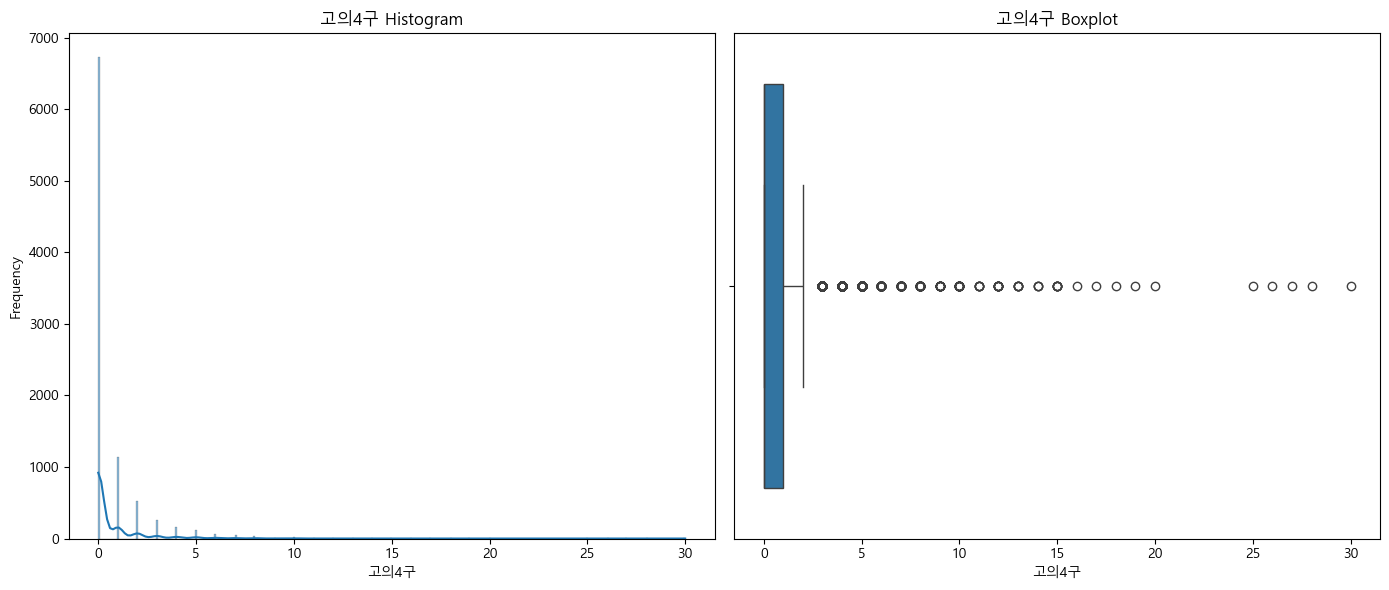

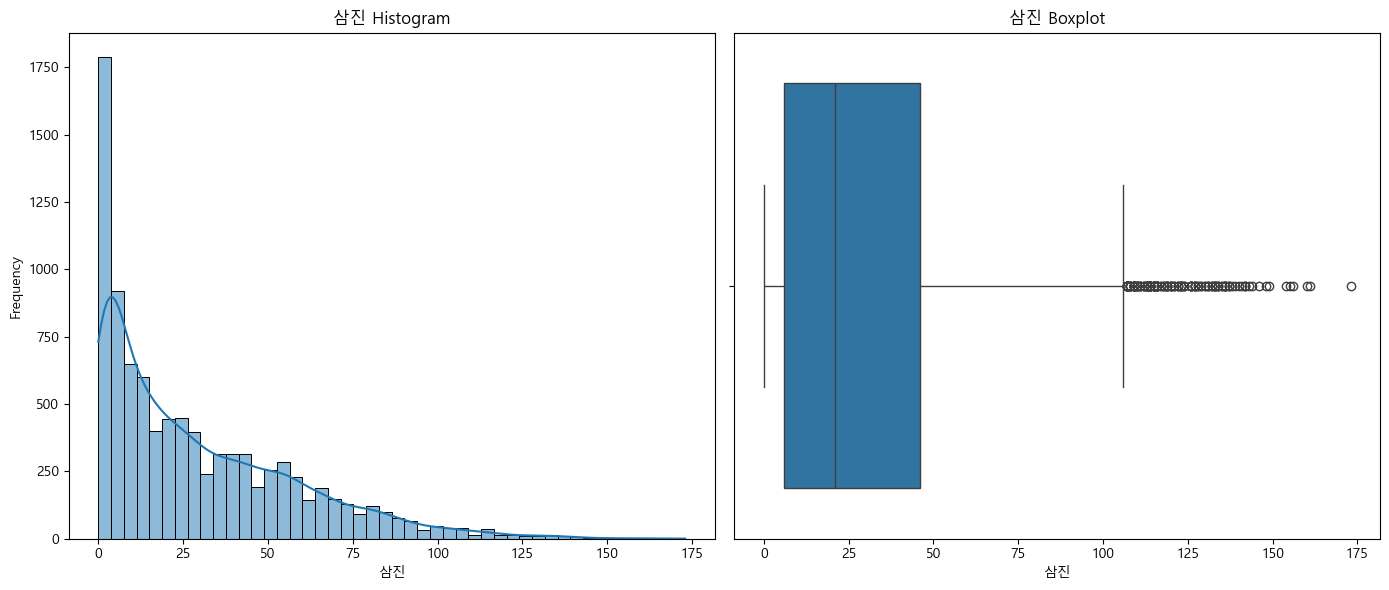

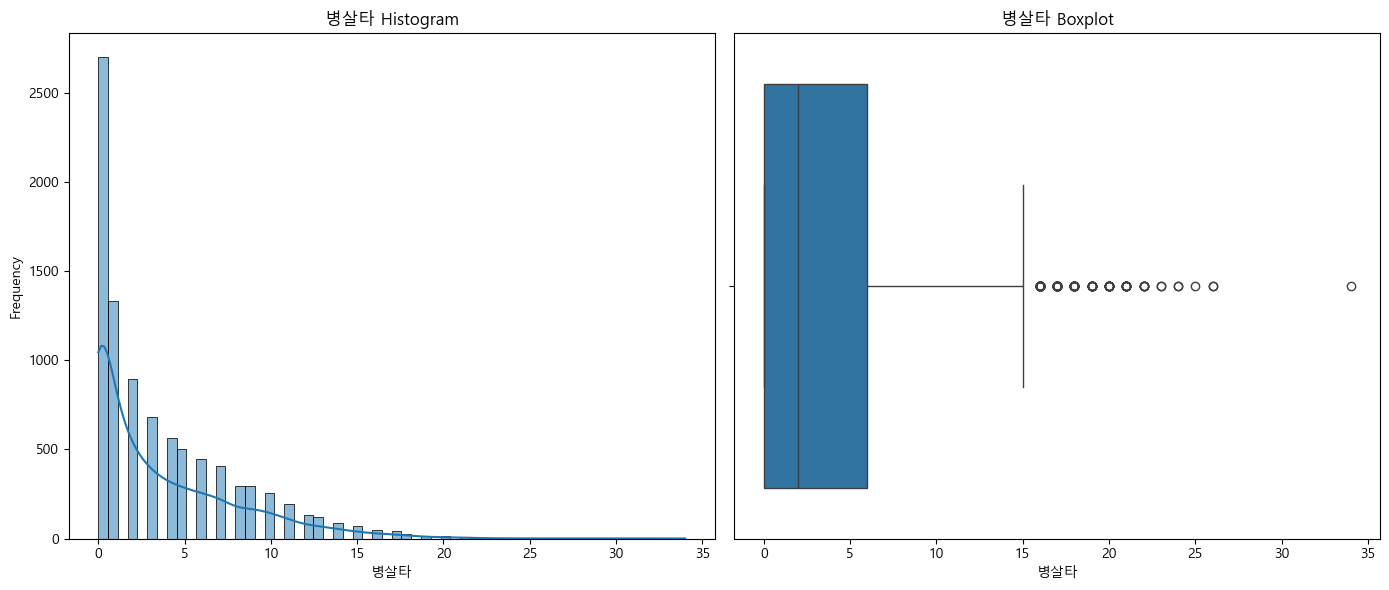

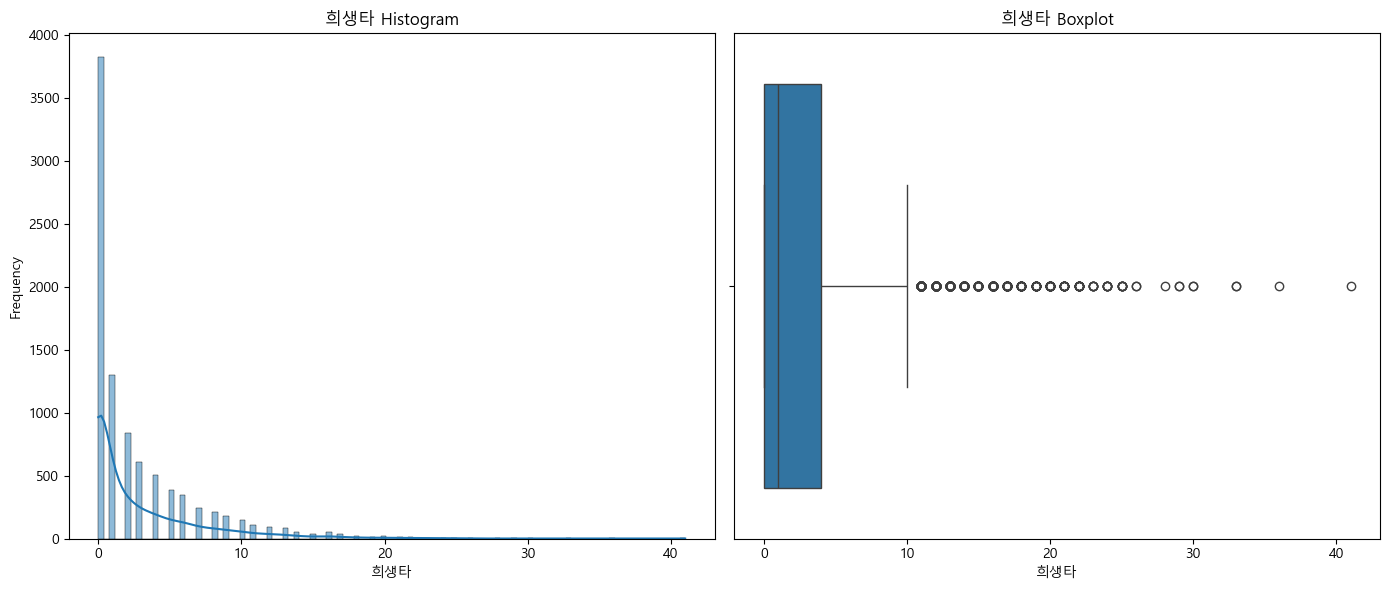

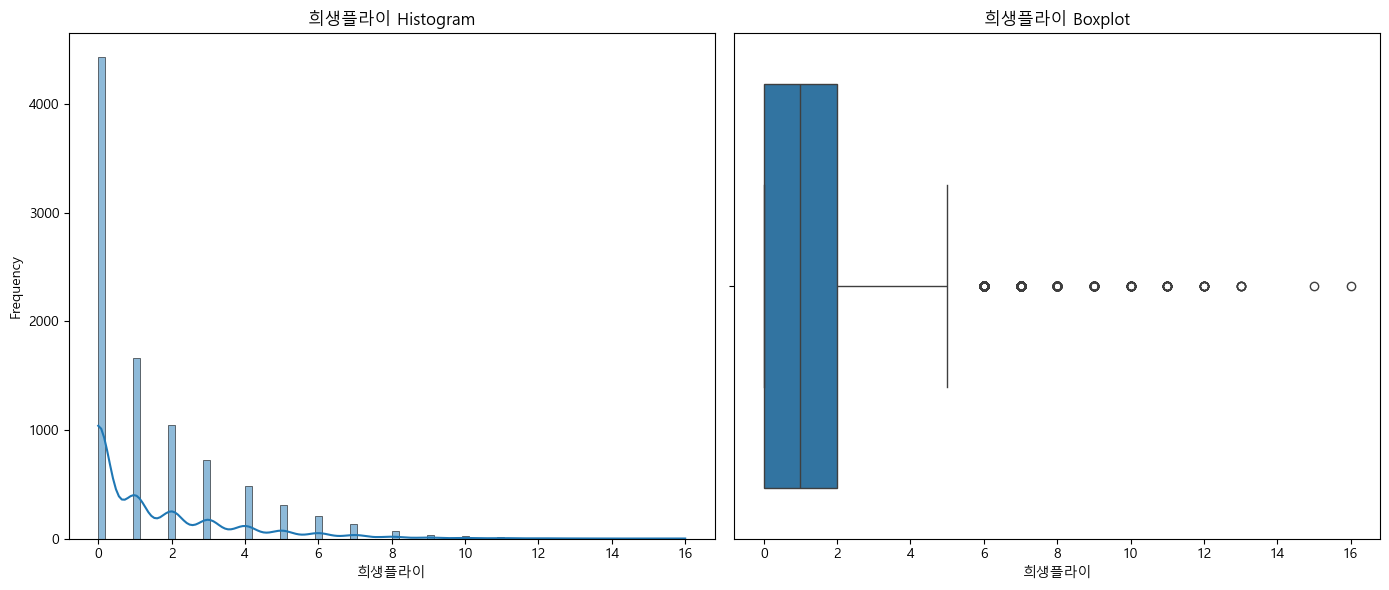

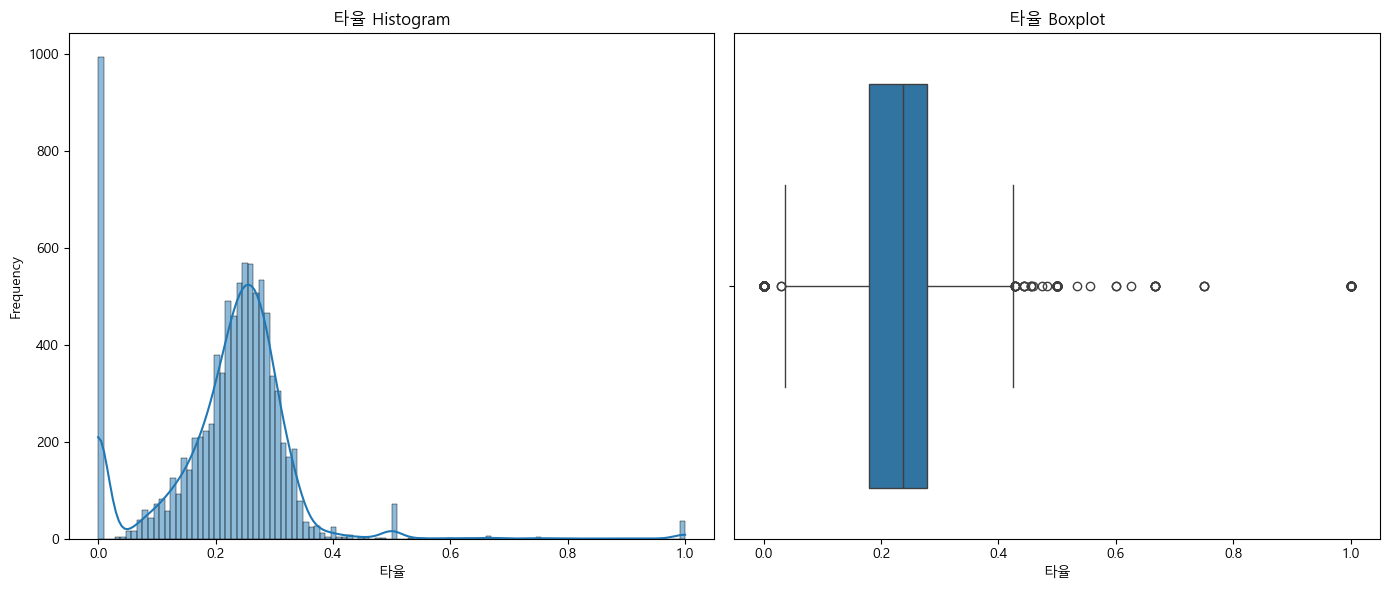

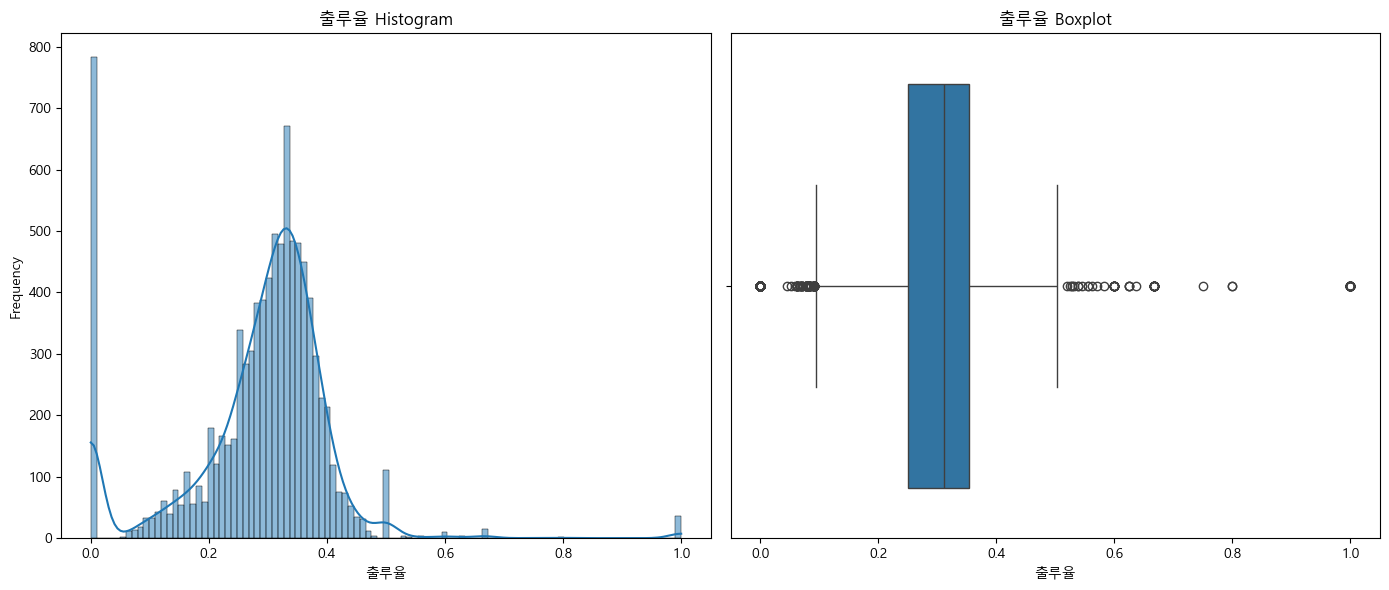

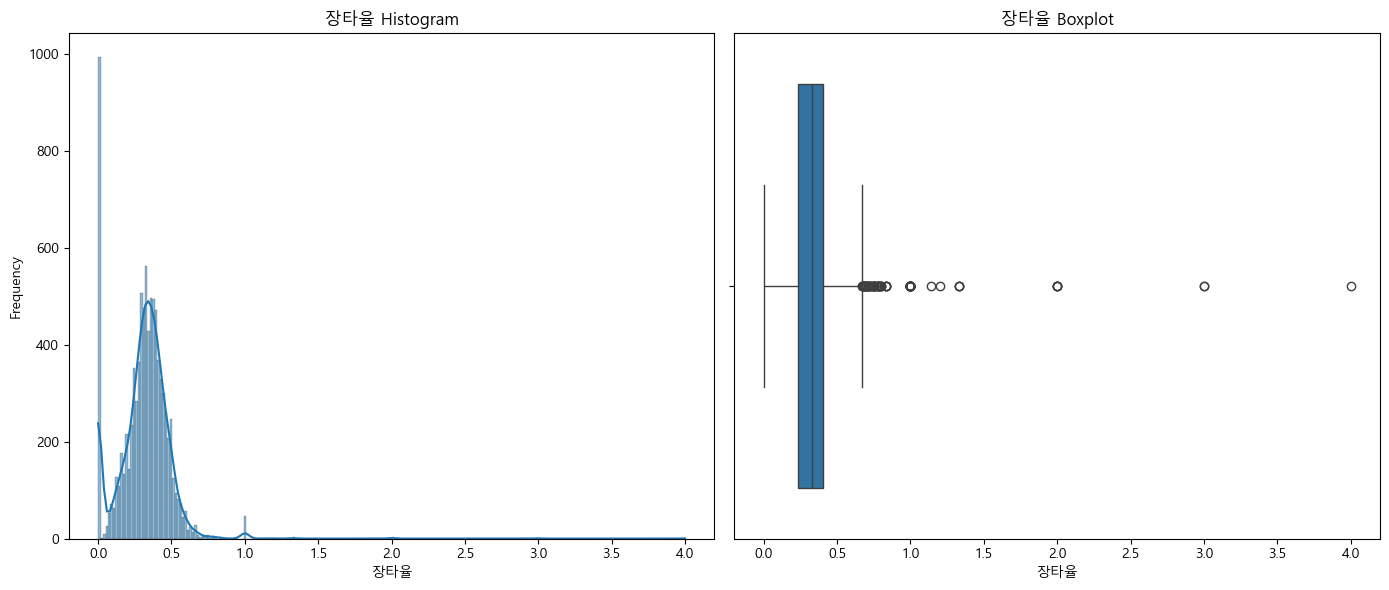

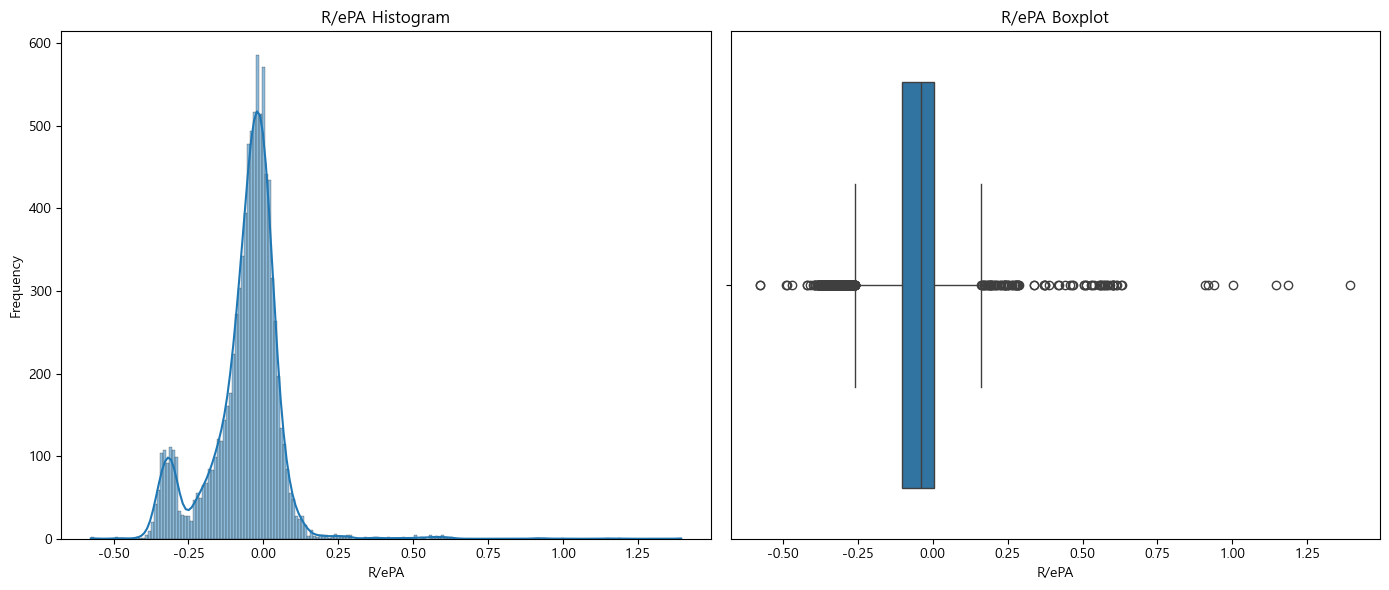

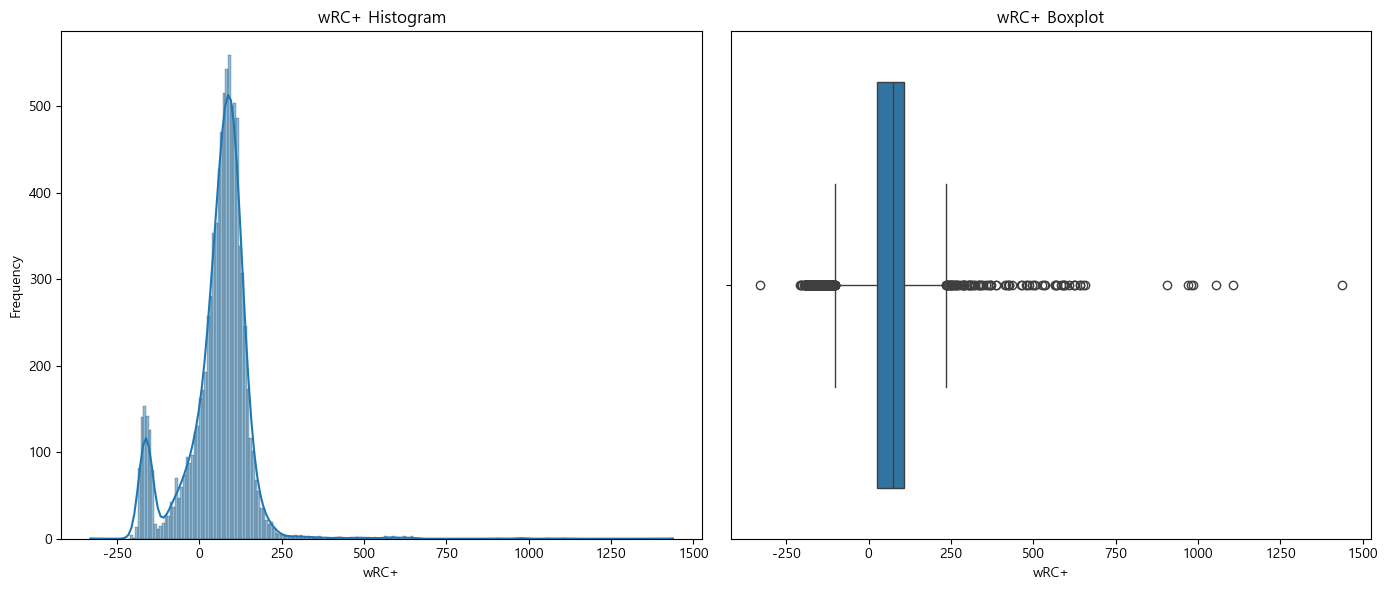

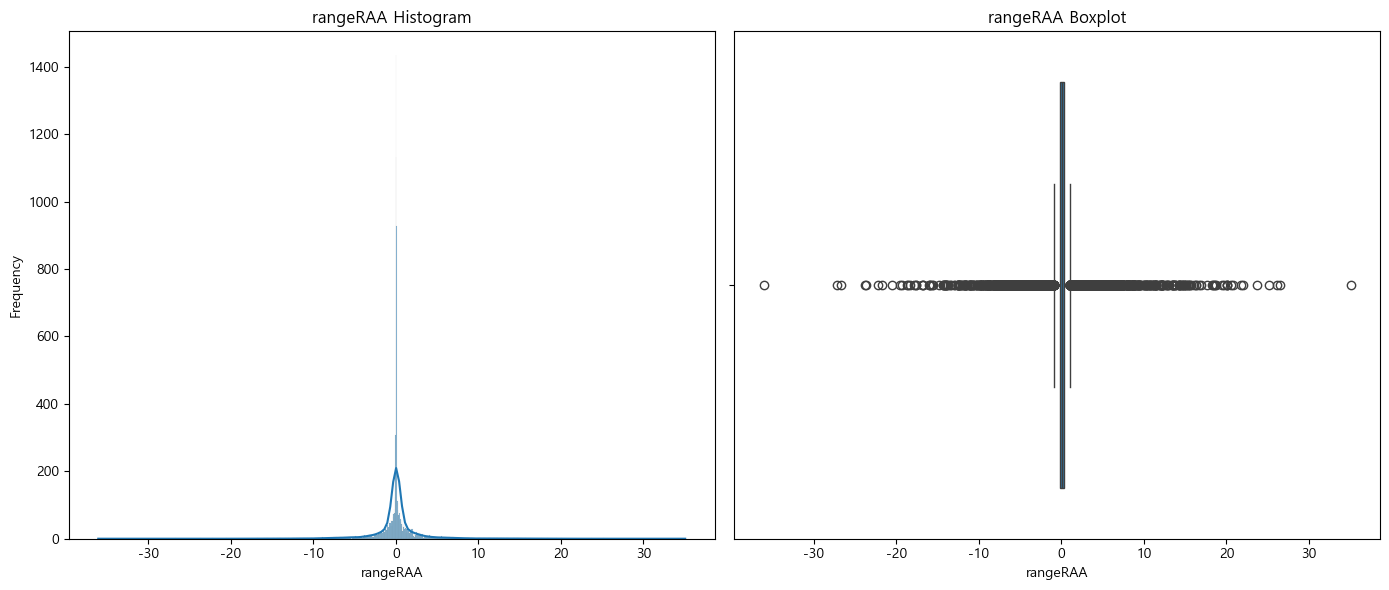

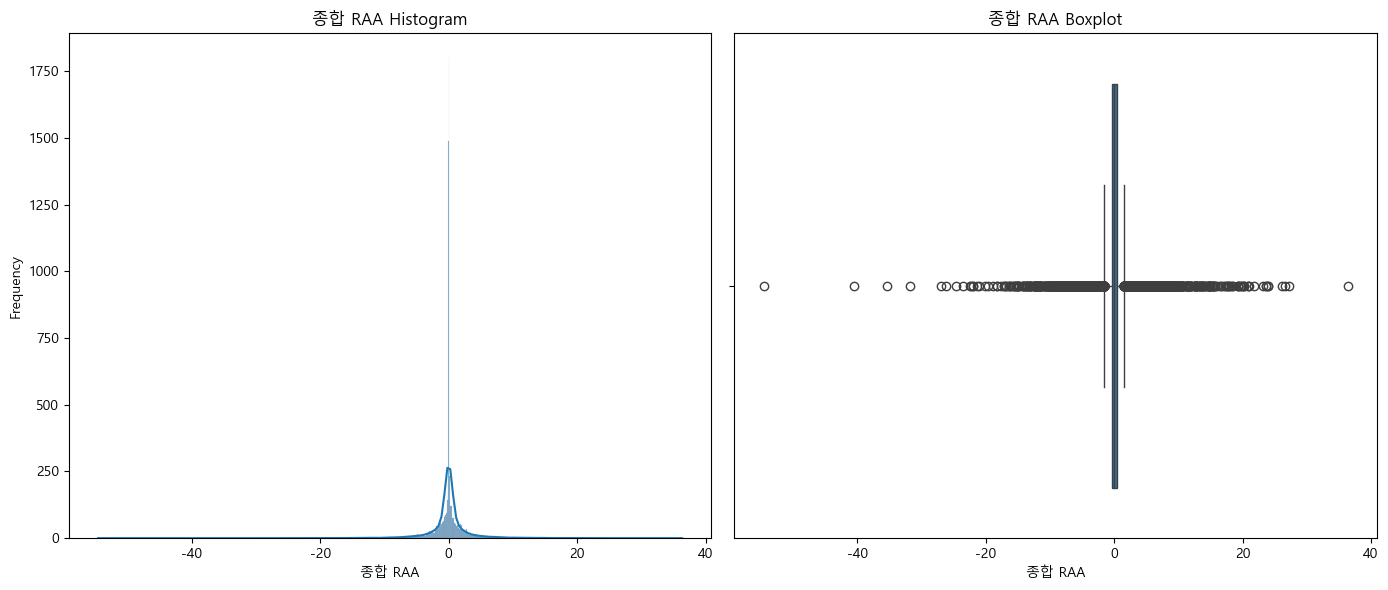

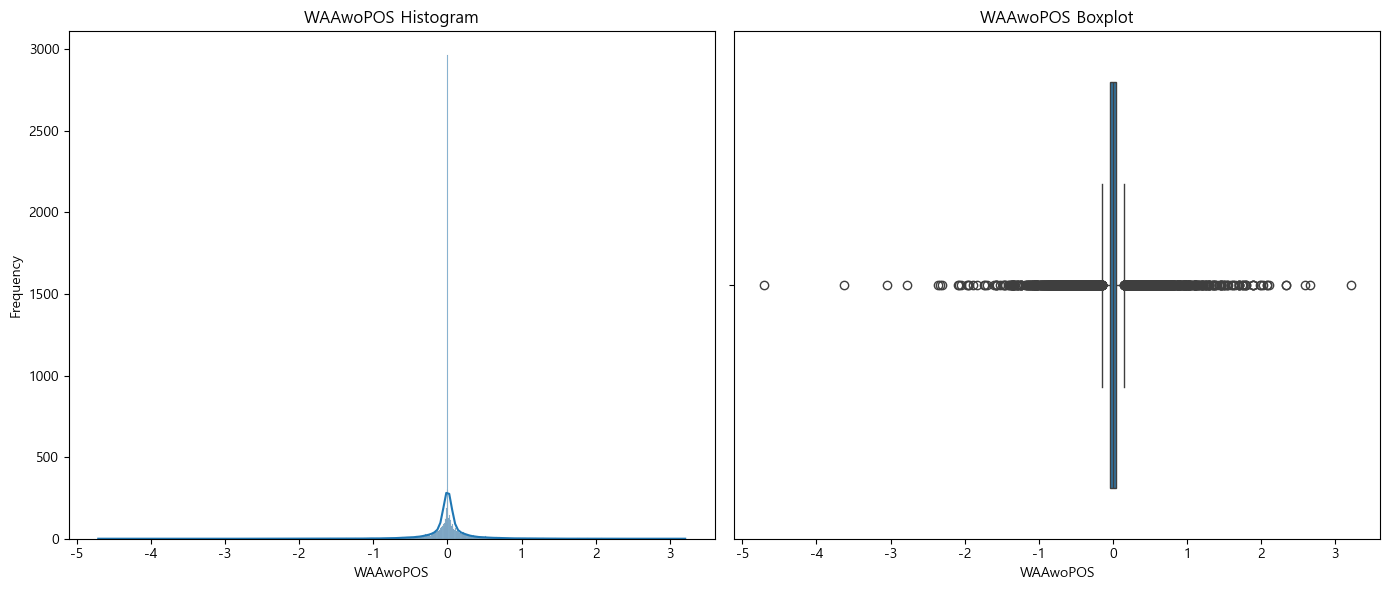

In [36]:


# 시각화할 컬럼 리스트를 만듭니다.
columns_to_visualize = [
    'war', '타수', '득점', '안타', '2루타', '3루타', '홈런', '타점', 
    '도루성공', '도루실패', '4구', '사구', '고의4구', '삼진', '병살타', 
    '희생타', '희생플라이', '타율', '출루율', '장타율', 'R/ePA', 
    'wRC+', 'rangeRAA', '종합 RAA', 'WAAwoPOS'
]

# 시각화할 컬럼마다 히스토그램과 박스플롯을 생성합니다.
for column in columns_to_visualize:
    plt.figure(figsize=(14, 6))
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df2[column].dropna(), kde=True)
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[column].dropna())
    plt.title(f'{column} Boxplot')
    plt.xlabel(column)
    
    # 플롯을 표시합니다.
    plt.tight_layout()
    plt.show()

In [46]:


# 특정 컬럼에서 0값을 가진 데이터를 제거하는 코드
columns_to_check = ['타율', '출루율', '장타율']

# 모든 컬럼에 대해 0값을 제거
for col in columns_to_check:
    df2 = df_tmp[df_tmp[col] != 0]
    df_tmp= df_tmp[df_tmp[col] != 0]


# 결과 확인
print(df_tmp)

       war     타수    득점     안타   2루타  3루타    홈런    타점  도루성공  도루실패    4구   사구  \
0     5.75  250.0  55.0  103.0  23.0  1.0  19.0  64.0  11.0   3.0  42.0  3.0   
1     4.38  284.0  54.0   97.0  20.0  5.0   8.0  47.0   9.0   2.0  45.0  1.0   
2     3.70  277.0  47.0   76.0  18.0  1.0   2.0  25.0  13.0  10.0  53.0  6.0   
3     3.46  214.0  42.0   72.0  15.0  3.0   3.0  27.0  34.0  14.0  42.0  5.0   
4     3.42  270.0  46.0   78.0  16.0  1.0  13.0  51.0   6.0   3.0  46.0  4.0   
...    ...    ...   ...    ...   ...  ...   ...   ...   ...   ...   ...  ...   
9151 -0.94   81.0  10.0   16.0   3.0  1.0   1.0   7.0   1.0   3.0   7.0  1.0   
9152 -0.99  305.0  22.0   75.0  10.0  0.0   2.0  30.0   0.0   1.0  34.0  3.0   
9153 -1.03   73.0  11.0   11.0   1.0  1.0   2.0   9.0   2.0   0.0   6.0  1.0   
9154 -2.48  319.0  30.0   71.0  11.0  0.0   5.0  32.0   1.0   3.0  26.0  1.0   
9155  1.55  404.0  46.0   97.0  18.0  0.0   7.0  53.0   3.0   2.0  48.0  5.0   

      고의4구     삼진   병살타  희생타  희생플라이    

# 이상치 대체법

In [50]:

from sklearn.impute import KNNImputer



# 이상치 감지 함수 (IQR 기법 사용)
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# 이상치 대체 함수들
def replace_outliers_with_mean(df, column):
    outliers = detect_outliers_iqr(df, column)
    mean_value = df[column].mean()
    df.loc[outliers.index, column] = mean_value
    return df

def replace_outliers_with_median(df, column):
    outliers = detect_outliers_iqr(df, column)
    median_value = df[column].median()
    df.loc[outliers.index, column] = median_value
    return df

def replace_outliers_with_boundaries(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = detect_outliers_iqr(df, column)
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound
    return df

def replace_outliers_with_knn(df, column):
    outliers = detect_outliers_iqr(df, column)
    df.loc[outliers.index, column] = np.nan
    imputer = KNNImputer(n_neighbors=5)
    df[[column]] = imputer.fit_transform(df[[column]])
    return df




## 이상치 대체 시각화

In [51]:
def plot_data_comparison(df2, column):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Comparison of Outlier Replacement Methods for {column}', fontsize=16)
    
    # 원본 데이터 시각화
    sns.histplot(df2[column], kde=True, ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Original')
    
    # 평균값 대체 시각화
    df_mean = replace_outliers_with_mean(df.copy(), column)
    sns.histplot(df_mean[column], kde=True, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Mean Replacement')
    
    # 중앙값 대체 시각화
    df_median = replace_outliers_with_median(df.copy(), column)
    sns.histplot(df_median[column], kde=True, ax=axes[0, 2], color='green')
    axes[0, 2].set_title('Median Replacement')
    
    # 경계값 대체 시각화
    df_boundaries = replace_outliers_with_boundaries(df.copy(), column)
    sns.histplot(df_boundaries[column], kde=True, ax=axes[1, 0], color='red')
    axes[1, 0].set_title('Boundaries Replacement')
    
    # KNN 대체 시각화
    df_knn = replace_outliers_with_knn(df.copy(), column)
    sns.histplot(df_knn[column], kde=True, ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('KNN Replacement')
    
    # 빈 플롯
    axes[1, 2].axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Processing column: 타율


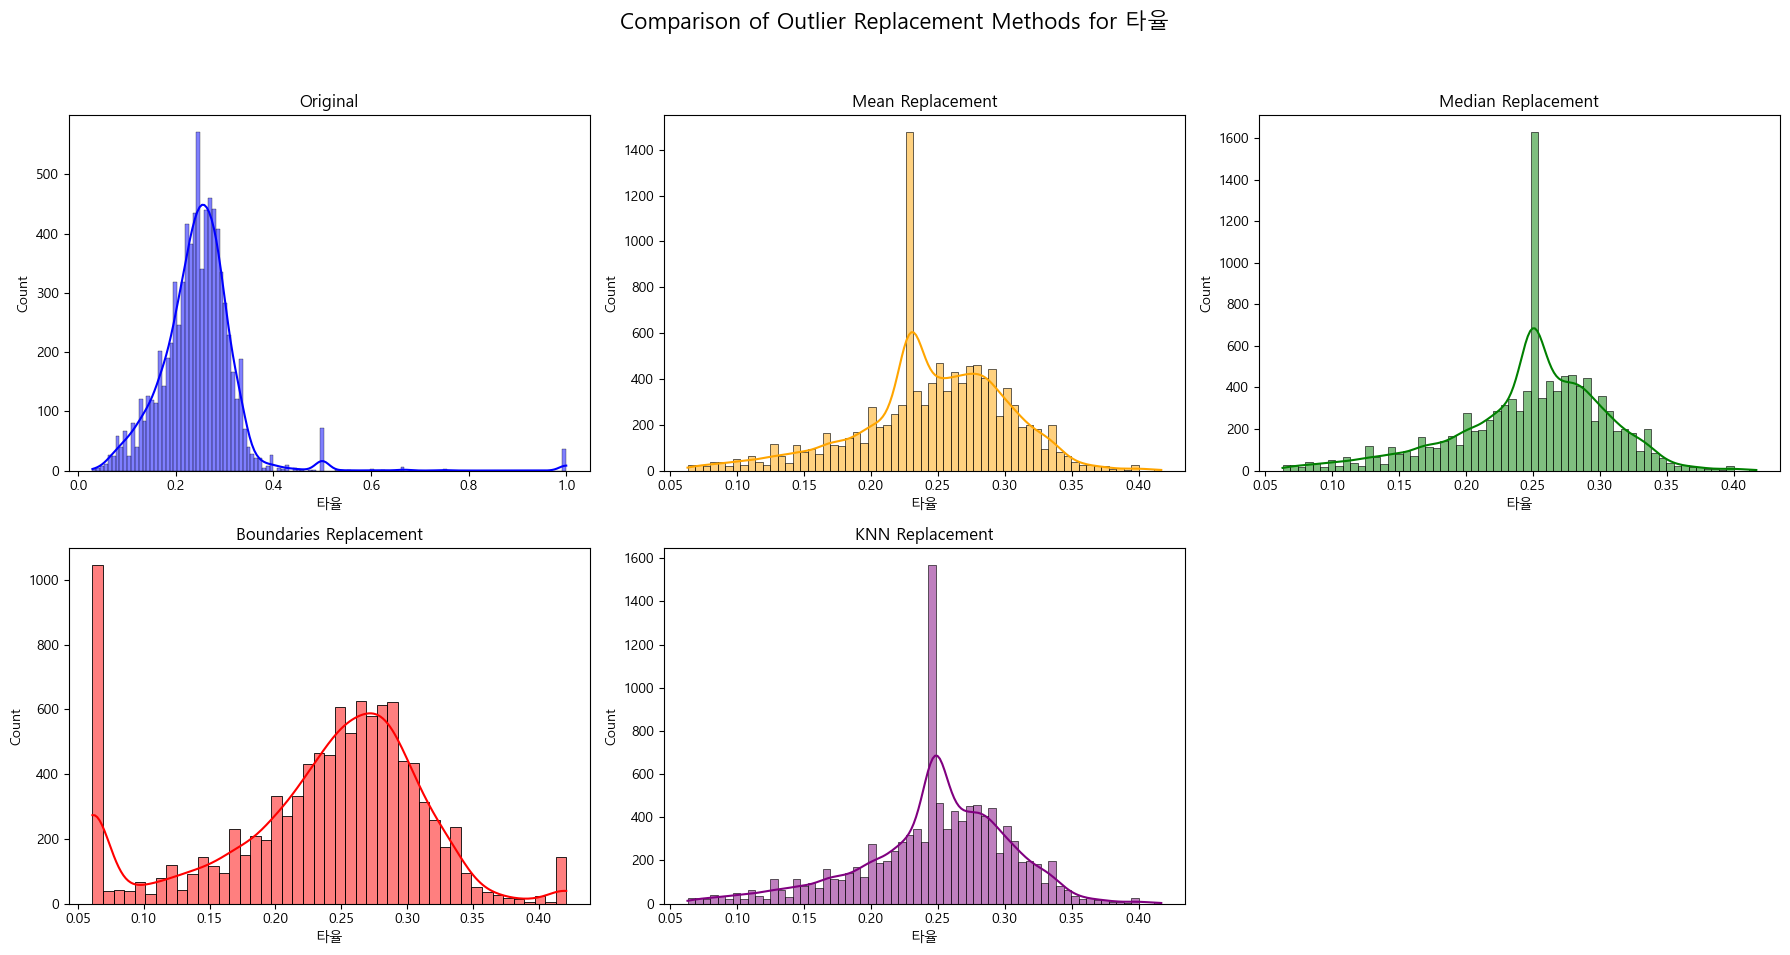

Processing column: 출루율


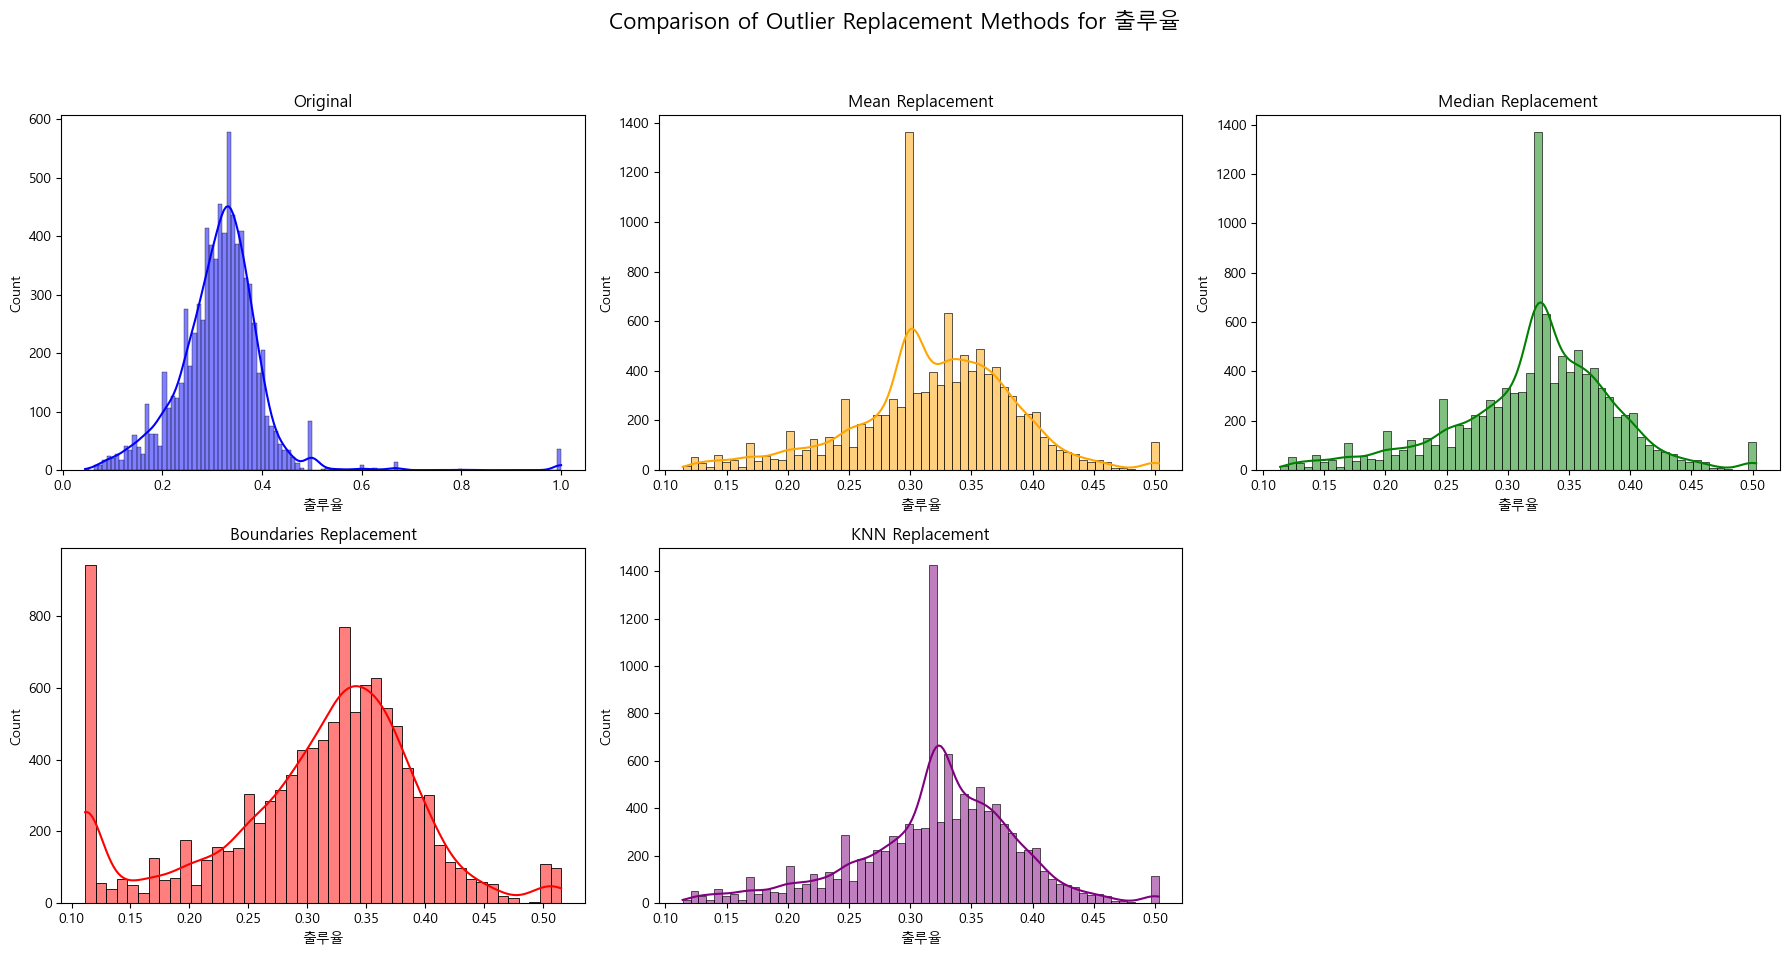

Processing column: 장타율


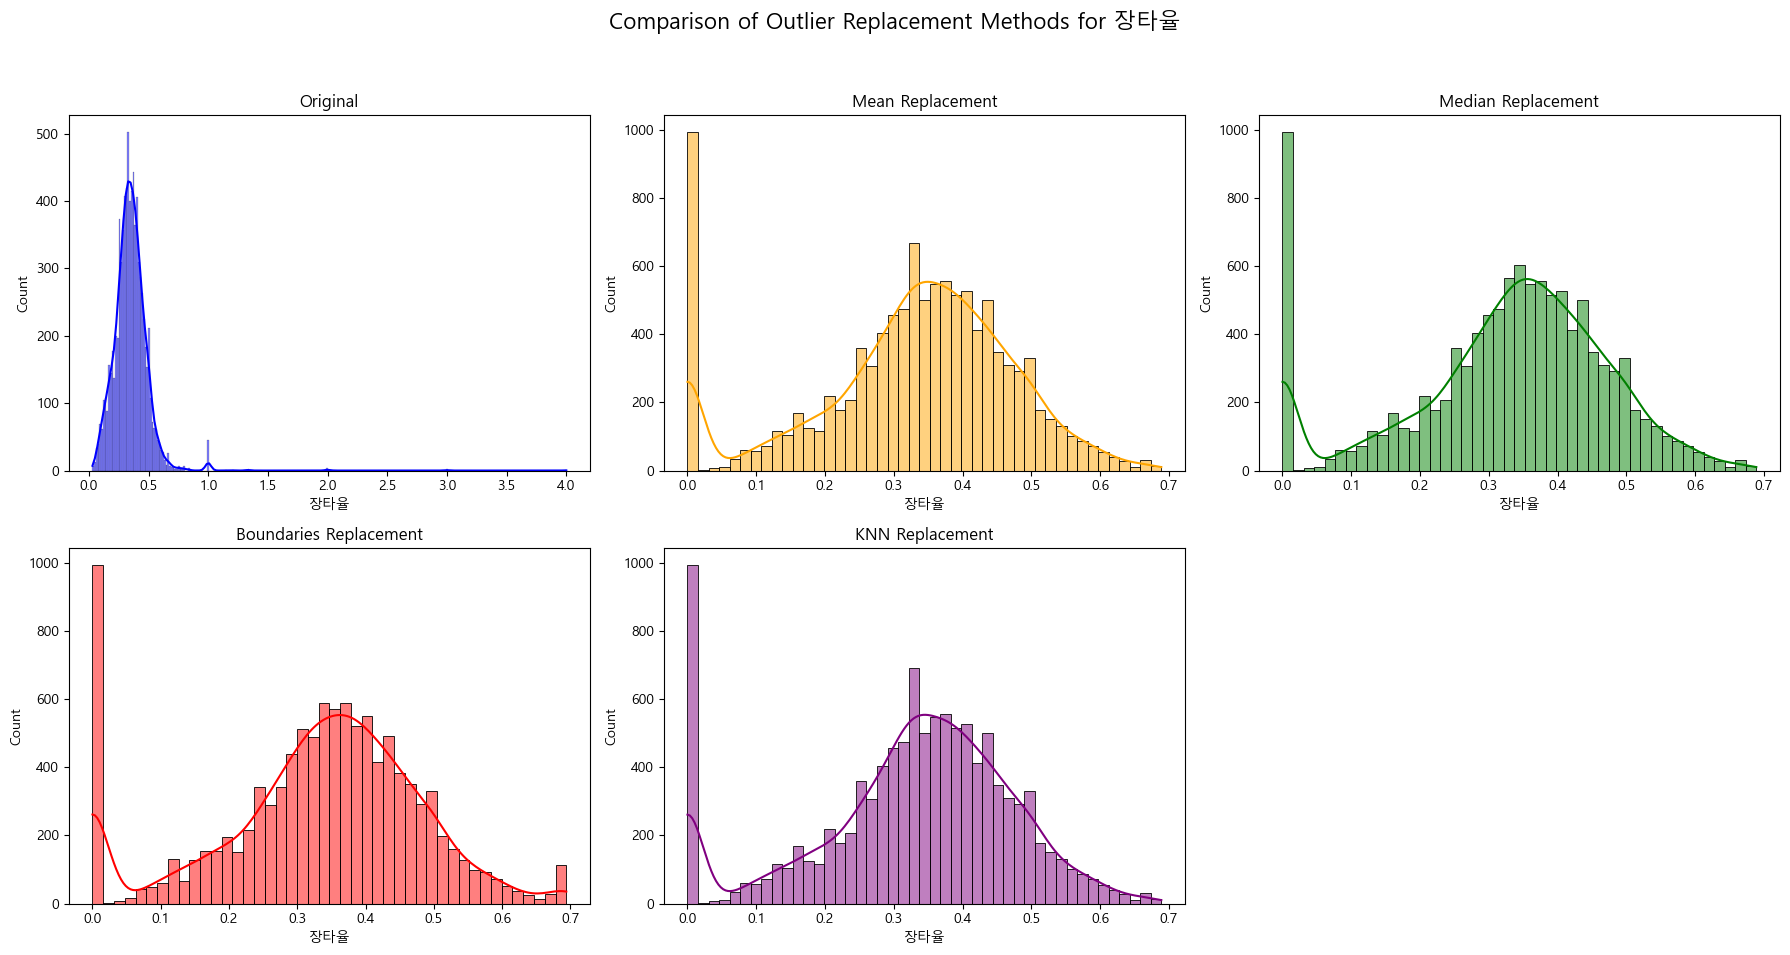

In [48]:
columns_to_transform = ['타율', '출루율', '장타율']


plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
for col in columns_to_transform:
    print(f"Processing column: {col}")
    plot_data_comparison(df2, col)

In [53]:
df2.to_csv("final_data.csv")